In [426]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt

# Directory:
# dir = 'not-flipped/'
# dir = 'flipped/'
# dir = 'single-coil/'
dir = 'build-channel/'

# Load data from output txt file:
data = np.loadtxt(dir+'AllTracks.txt')

# Select event ID:
# eventID = -2 # reference
eventID = 1 # with initial conditions

# Number of solenoids in sim:
n = 6

In [427]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
r_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
Lz_vals = []
for i in range(data.shape[0]):
    id = data[i][8]
    if id == eventID:
        x = data[i][0]*0.1; y = data[i][1]*0.1  # mm -> cm
        x_vals.append(x)
        y_vals.append(y)
        z = data[i][2]*0.001 # mm -> m
        z_vals.append(z)
        r = np.sqrt(x**2+y**2)
        r_vals.append(r)
        px = data[i][3]; py = data[i][4]; pz = data[i][5]
        px_vals.append(px) # MeV/c
        py_vals.append(py)
        pz_vals.append(pz)
        ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
        t_vals.append(data[i][6]) # ns
        Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
        Bx_vals.append(Bx)
        By_vals.append(By)
        Bz_vals.append(Bz)
        Lz = x*py-y*px
        Lz_vals.append(Lz)
        del px, py, pz, Bx, By, Bz

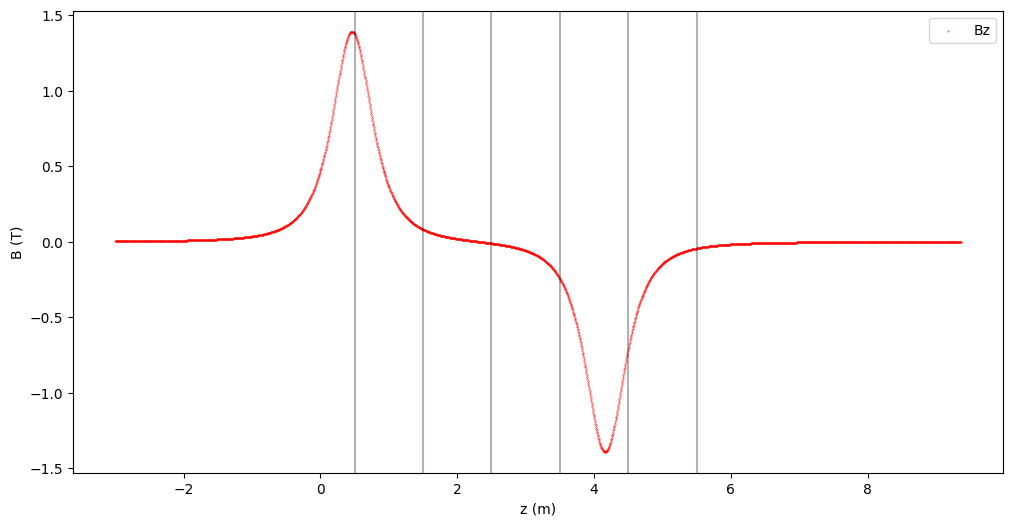

In [428]:
# Plot Bz along z:
plt.figure(figsize = (12,6))
for i in range(n):
    plt.axvline(x=0.5+i*1,color='black',alpha=0.3)
plt.scatter(z_vals,Bz_vals,color='red',label='Bz',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
# plt.savefig(dir+'Bz.png',dpi=300)
plt.show()

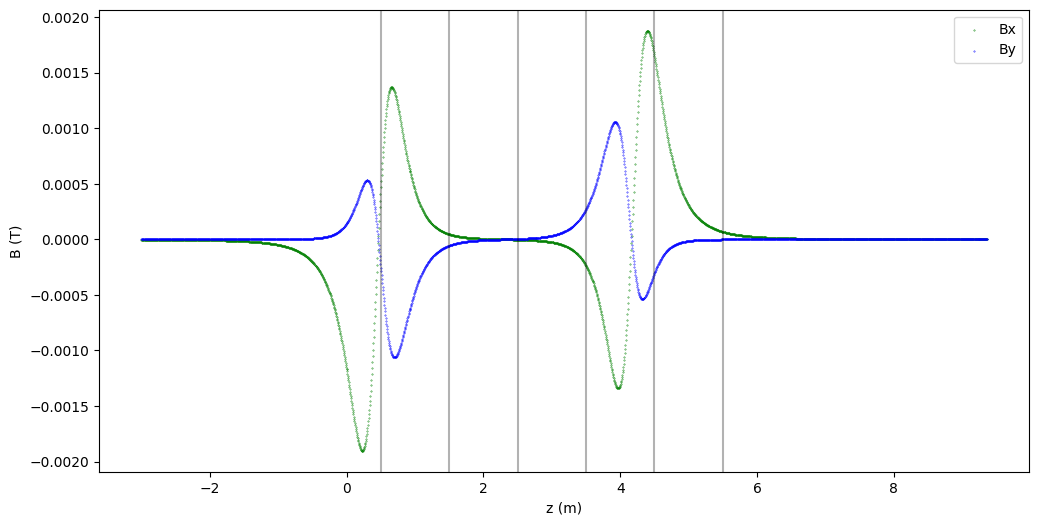

In [429]:
# Plot Bx, By along z:
plt.figure(figsize = (12,6))
for i in range(n):
    plt.axvline(x=0.5+i*1,color='black',alpha=0.3)
plt.scatter(z_vals,Bx_vals,color='green',label='Bx',s=0.1)
plt.scatter(z_vals,By_vals,color='blue',label='By',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

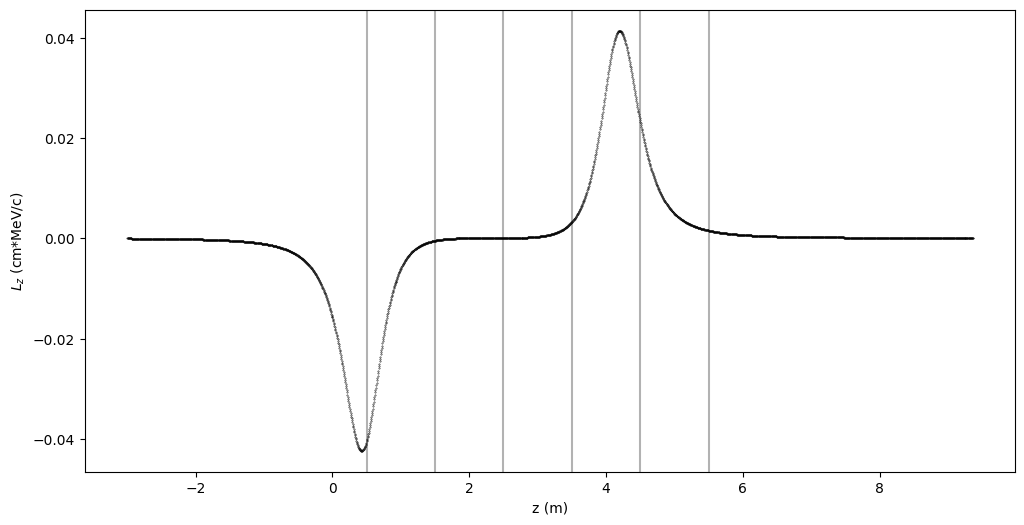

In [430]:
# Plot Lz along z:
plt.figure(figsize = (12,6))
for i in range(n):
    plt.axvline(x=0.5+i*1,color='black',alpha=0.3)
plt.scatter(z_vals,Lz_vals,color='black',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('$L_z$ (cm*MeV/c)')
plt.show()

In [439]:
# Find min and max Lz:
min_Lz = np.min(Lz_vals)
max_Lz = np.max(Lz_vals)
print(f'Minimum L_z: {min_Lz}')
print(f'Maximum L_z: {max_Lz}')

Minimum L_z: -0.0423027829944
Maximum L_z: 0.04140650469620001


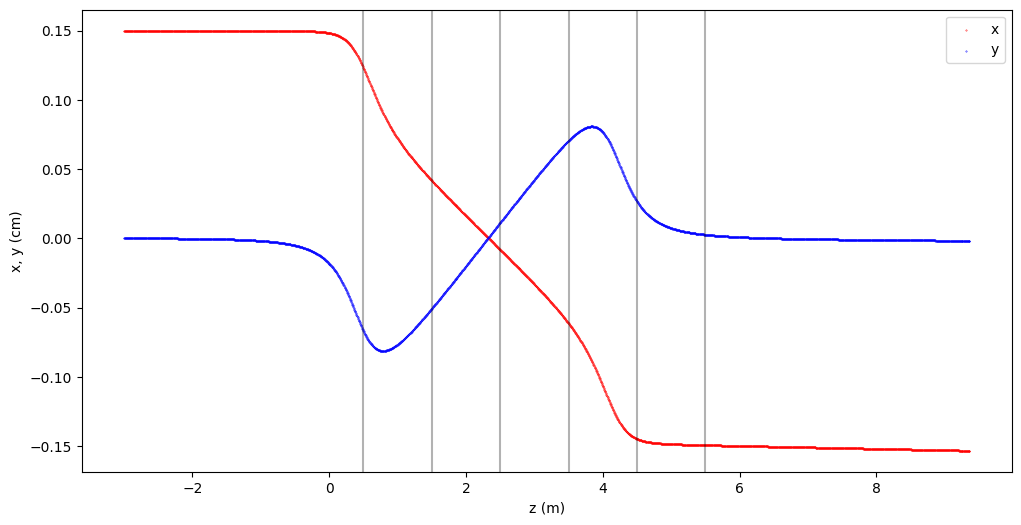

In [431]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
for i in range(n):
    plt.axvline(x=0.5+i*1,color='black',alpha=0.3)
plt.scatter(z_vals,x_vals,color='red',label='x',s=0.1)
plt.scatter(z_vals,y_vals,color='blue',label='y',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

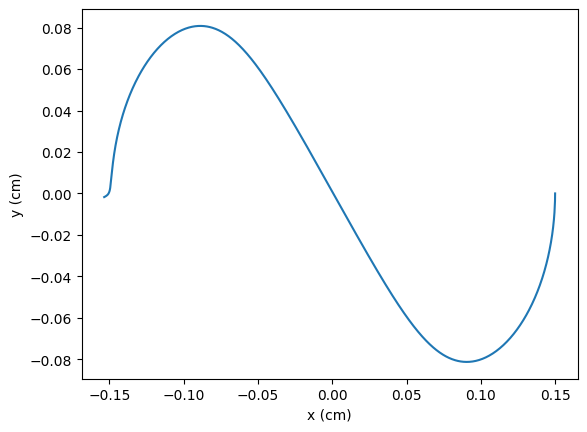

In [432]:
# Plot projection in x-y plane:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

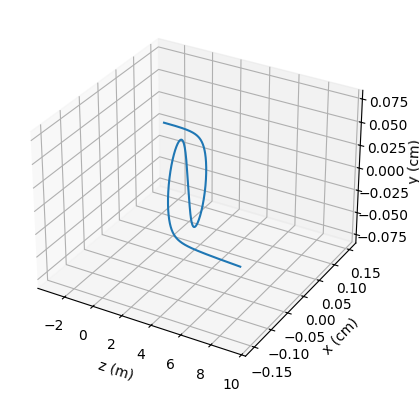

In [433]:
# 3D plot of trajectory:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('z (m)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.show()

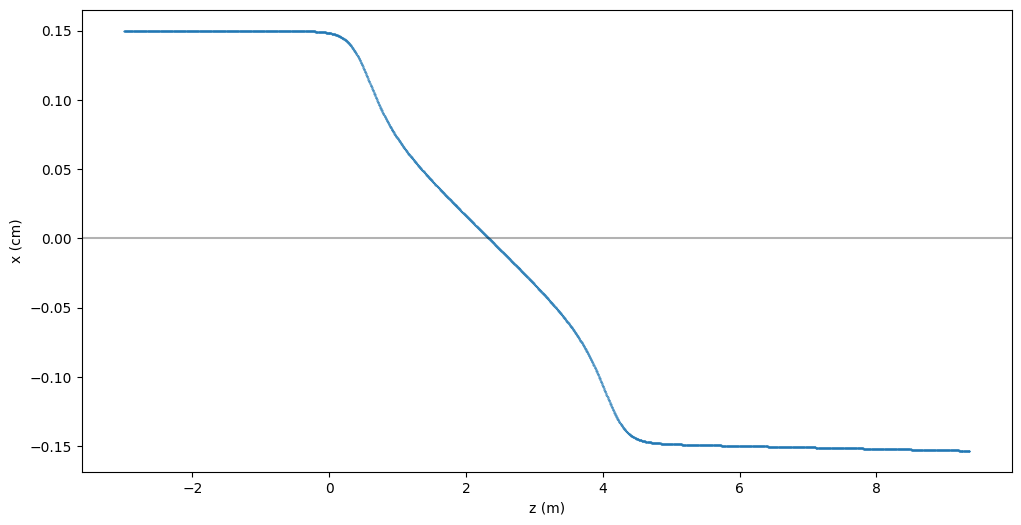

In [434]:
# Plot x along z:
plt.figure(figsize = (12,6))
plt.axhline(y=0,color='black',alpha=0.3)
plt.scatter(z_vals,x_vals,s=0.1)
plt.xlabel('z (m)')
plt.ylabel('x (cm)')
plt.show()

In [435]:
# Compute focusing length:
count1 = 0; count2 = 0
for i in range(len(z_vals)):
    if abs(x_vals[i]) < 0.001 and count1 == 0:
        end_f_index = i
        count1 += 1
    if z_vals[i] > 0.5 and count2 == 0:
        start_f_index = i
        count2 += 1
f = z_vals[end_f_index] - z_vals[start_f_index]
print(f'f = {np.round(f,5)*1000} mm')

f = 1810.0 mm


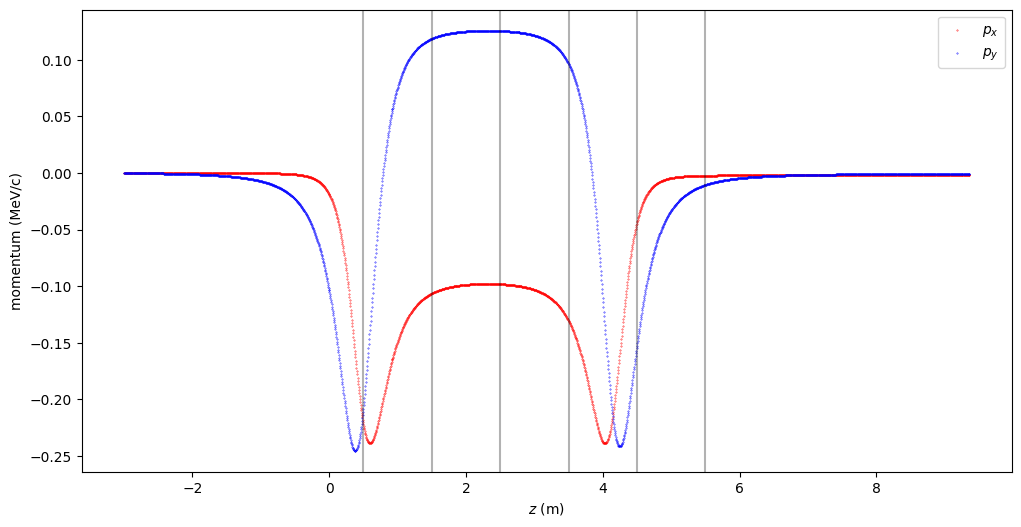

In [436]:
# Plot px, py along z:
plt.figure(figsize = (12,6))
for i in range(n):
    plt.axvline(x=0.5+i*1,color='black',alpha=0.3)
plt.scatter(z_vals,px_vals,s=0.1,label='$p_x$',color='red')
plt.scatter(z_vals,py_vals,s=0.1,label='$p_y$',color='blue')
plt.ylabel('momentum (MeV/c)')
plt.xlabel('$z$ (m)')
plt.legend()
plt.show()

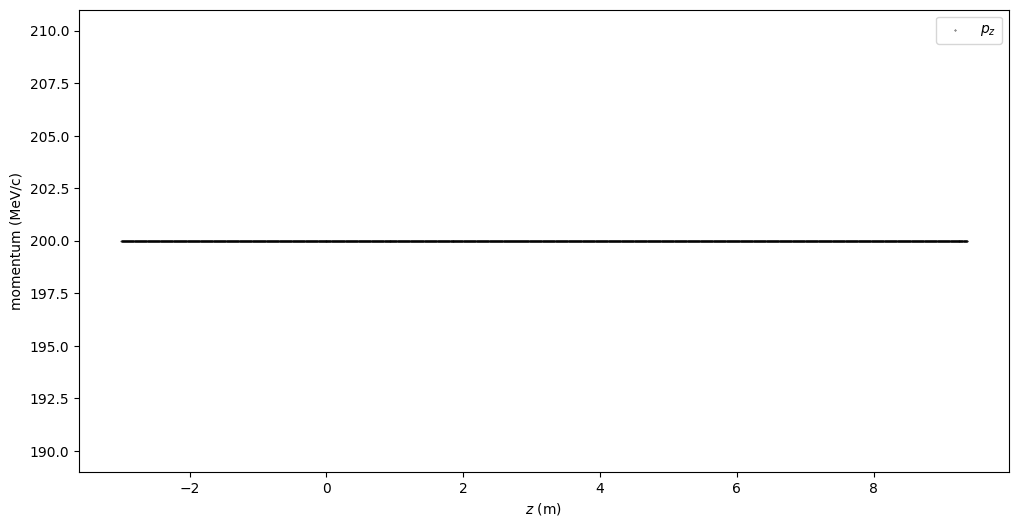

In [437]:
# Plot pz along z:
plt.figure(figsize = (12,6))
plt.scatter(z_vals,pz_vals,s=0.1,label='$p_z$',color='black')
plt.ylabel('momentum (MeV/c)')
plt.xlabel('$z$ (m)')
plt.legend()
plt.show()